### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [1]:
### Data Collection
import pandas_datareader as pdr
key=""

In [4]:
import pandas as pd

In [9]:
import os
os.getcwd()

'C:\\Users\\Chinmay\\Downloads\\Stock-MArket-Forecasting-master\\Stock-MArket-Forecasting-master'

In [22]:
import pandas as pd
import numpy as np

In [23]:
df=pd.read_csv('data_stocks.csv')

In [24]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [25]:
df.tail()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
41261,1504209360,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
41262,1504209420,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
41263,1504209480,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
41264,1504209540,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
41265,1504209600,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


In [26]:
df1=df.reset_index()['NASDAQ.AAPL']

In [27]:
df1

0        143.6800
1        143.7000
2        143.6901
3        143.6400
4        143.6600
           ...   
41261    164.1100
41262    164.1200
41263    164.0100
41264    163.8800
41265    163.9800
Name: NASDAQ.AAPL, Length: 41266, dtype: float64

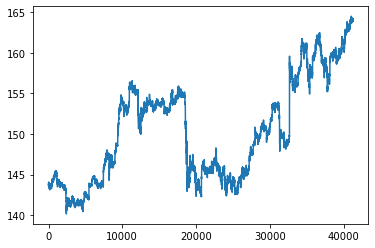

In [28]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [29]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [30]:
import numpy as np

In [31]:
df1

0        143.6800
1        143.7000
2        143.6901
3        143.6400
4        143.6600
           ...   
41261    164.1100
41262    164.1200
41263    164.0100
41264    163.8800
41265    163.9800
Name: NASDAQ.AAPL, Length: 41266, dtype: float64

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [33]:
print(df1)

[[0.14455852]
 [0.14537988]
 [0.14497331]
 ...
 [0.97946612]
 [0.97412731]
 [0.97823409]]


In [34]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [35]:
training_size,test_size

(26822, 14444)

In [36]:
train_data

array([[0.14455852],
       [0.14537988],
       [0.14497331],
       ...,
       [0.21437372],
       [0.21806982],
       [0.20698152]])

In [37]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [38]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [39]:
print(X_train.shape), print(y_train.shape)

(26721, 100)
(26721,)


(None, None)

In [40]:
print(X_test.shape), print(ytest.shape)

(14343, 100)
(14343,)


(None, None)

In [41]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [42]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [51]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
418/418 [==============================] - 58s 139ms/step - loss: 5.5776e-04 - val_loss: 5.5341e-04
Epoch 2/10
418/418 [==============================] - 57s 137ms/step - loss: 9.9182e-05 - val_loss: 4.7099e-04
Epoch 3/10
418/418 [==============================] - 58s 139ms/step - loss: 8.8211e-05 - val_loss: 2.4524e-04
Epoch 4/10
418/418 [==============================] - 58s 138ms/step - loss: 8.0248e-05 - val_loss: 3.1429e-04
Epoch 5/10
418/418 [==============================] - 58s 139ms/step - loss: 7.1888e-05 - val_loss: 3.7294e-04
Epoch 6/10
418/418 [==============================] - 58s 140ms/step - loss: 7.4825e-05 - val_loss: 3.5558e-04
Epoch 7/10
418/418 [==============================] - 58s 139ms/step - loss: 5.8344e-05 - val_loss: 2.5054e-04
Epoch 8/10
418/418 [==============================] - 58s 140ms/step - loss: 5.7731e-05 - val_loss: 3.1300e-04
Epoch 9/10
418/418 [==============================] - 59s 140ms/step - loss: 4.7988e-05 - val_loss: 1.0091e-04
E

In [56]:
import tensorflow as tf

In [57]:
tf.__version__

'2.9.1'

In [58]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

449/449 [==============================] - 13s 30ms/step


In [60]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [61]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3737.2638025323563

In [62]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3931.8311759784406

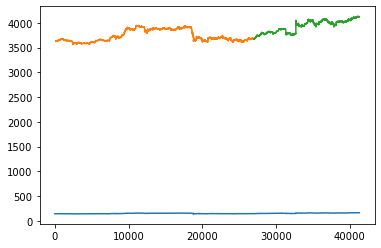

In [63]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [64]:
len(test_data)

14444

In [65]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 14103)

In [66]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [67]:
temp_input

[0.23326488706365556,
 0.23470225872689987,
 0.23510472279260863,
 0.23600000000000065,
 0.2357289527720745,
 0.2357289527720745,
 0.23696098562628443,
 0.23531827515400394,
 0.23655030800821386,
 0.23696098562628443,
 0.23798767967145906,
 0.23942505133470338,
 0.24127310061601648,
 0.24004106776180745,
 0.23932238193018573,
 0.23696098562628443,
 0.23244353182751532,
 0.23470225872689987,
 0.23244763860369666,
 0.23162217659137685,
 0.23754825462012352,
 0.23248459958932255,
 0.23326488706365556,
 0.2308008213552366,
 0.23326488706365556,
 0.23039014373716693,
 0.2291581108829579,
 0.2193018480492821,
 0.22422997946612,
 0.2291581108829579,
 0.23819301848049346,
 0.2439425051334707,
 0.24549486652977492,
 0.2509240246406579,
 0.25133470225872756,
 0.25211498973306057,
 0.25626283367556546,
 0.2542094455852162,
 0.25338809034907683,
 0.25297741273100627,
 0.25174537987679724,
 0.25462012320328675,
 0.25503080082135554,
 0.2620123203285418,
 0.26324435318275174,
 0.2644763860369608,
 0

In [84]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=14102
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.23470226 0.23510472 0.236      ... 0.97946612 0.97412731 0.97823409]
0 day output [[0.96220535]]
1 day input [0.23510472 0.236      0.23572895 ... 0.97412731 0.97823409 0.96220535]
1 day output [[0.95886517]]
2 day input [0.236      0.23572895 0.23572895 ... 0.97823409 0.96220535 0.95886517]
2 day output [[0.9542319]]
3 day input [0.23572895 0.23572895 0.23696099 ... 0.96220535 0.95886517 0.95423192]
3 day output [[0.94875956]]
4 day input [0.23572895 0.23696099 0.23531828 ... 0.95886517 0.95423192 0.94875956]
4 day output [[0.9428589]]
5 day input [0.23696099 0.23531828 0.23655031 ... 0.95423192 0.94875956 0.94285887]
5 day output [[0.9368259]]
6 day input [0.23531828 0.23655031 0.23696099 ... 0.94875956 0.94285887 0.93682587]
6 day output [[0.9308503]]
7 day input [0.23655031 0.23696099 0.23798768 ... 0.94285887 0.93682587 0.93085033]
7 day output [[0.9250496]]
8 day input [0.23696099 0.23798768 0.23942505 ... 0.93682587 0.93085033 0.9250496 ]
8 day output [[0.91949445

In [85]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [86]:
import matplotlib.pyplot as plt

In [87]:
len(df1)

41266

ValueError: x and y must have same first dimension, but have shapes (100,) and (41265, 1)

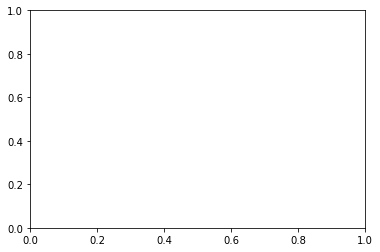

In [90]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

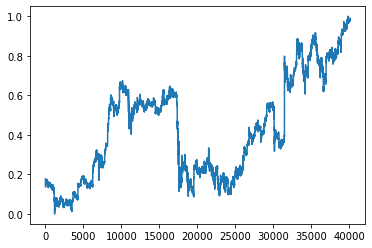

In [78]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [79]:
df3=scaler.inverse_transform(df3).tolist()

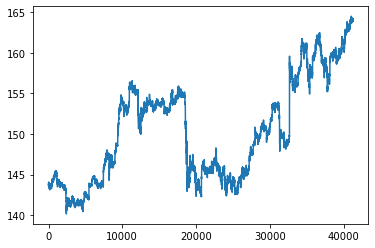

In [80]:
plt.plot(df3)

In [91]:
df4=df.reset_index()['NASDAQ.ADP']

In [92]:
df4

0        102.2300
1        102.1400
2        102.2125
3        102.1400
4        102.0600
           ...   
41261    106.5650
41262    106.5900
41263    106.5200
41264    106.4000
41265    106.4700
Name: NASDAQ.ADP, Length: 41266, dtype: float64

In [93]:
df4.head()

0    102.2300
1    102.1400
2    102.2125
3    102.1400
4    102.0600
Name: NASDAQ.ADP, dtype: float64

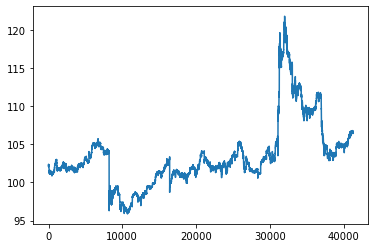

In [94]:
import matplotlib.pyplot as plt
plt.plot(df4)

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

In [99]:
##splitting dataset into train and test split
training_size=int(len(df4)*0.65)
test_size=len(df4)-training_size
train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]

In [100]:
training_size,test_size

(26822, 14444)

In [101]:
train_data

array([[0.14455852],
       [0.14537988],
       [0.14497331],
       ...,
       [0.21437372],
       [0.21806982],
       [0.20698152]])

In [102]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [103]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [104]:
print(X_train.shape), print(y_train.shape)

(26721, 100)
(26721,)


(None, None)

In [105]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [106]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [107]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [108]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=5,batch_size=64,verbose=1)

Epoch 1/5
418/418 [==============================] - 62s 139ms/step - loss: 0.0017 - val_loss: 3.8233e-04
Epoch 2/5
418/418 [==============================] - 59s 142ms/step - loss: 8.6886e-05 - val_loss: 2.4188e-04
Epoch 3/5
418/418 [==============================] - 60s 145ms/step - loss: 8.2478e-05 - val_loss: 1.8253e-04
Epoch 4/5
418/418 [==============================] - 61s 145ms/step - loss: 7.6431e-05 - val_loss: 1.4545e-04
Epoch 5/5
418/418 [==============================] - 61s 146ms/step - loss: 6.9063e-05 - val_loss: 3.1038e-04


In [110]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

449/449 [==============================] - 13s 29ms/step


In [111]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [112]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.008147098773173772

In [113]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.017617576123129496

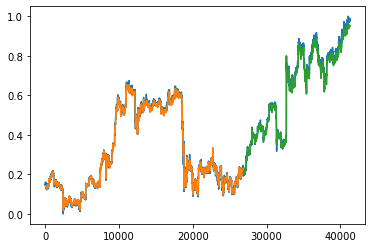

In [114]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df4)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [115]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [116]:
temp_input

[[0.23819301848049346],
 [0.2439425051334707],
 [0.24549486652977492],
 [0.2509240246406579],
 [0.25133470225872756],
 [0.25211498973306057],
 [0.25626283367556546],
 [0.2542094455852162],
 [0.25338809034907683],
 [0.25297741273100627],
 [0.25174537987679724],
 [0.25462012320328675],
 [0.25503080082135554],
 [0.2620123203285418],
 [0.26324435318275174],
 [0.2644763860369608],
 [0.2624229979466124],
 [0.26324435318275174],
 [0.26776180698151997],
 [0.2739219712525678],
 [0.270217659137578],
 [0.2724845995893226],
 [0.2757700205338818],
 [0.2772073921971252],
 [0.28008213552361383],
 [0.28459958932238294],
 [0.28090349075975407],
 [0.283367556468173],
 [0.28603696098562637],
 [0.2932238193018488],
 [0.28887063655030776],
 [0.288911704312115],
 [0.2874743326488707],
 [0.28536344969199234],
 [0.2891170431211503],
 [0.29363860369609895],
 [0.2869404517453802],
 [0.29075975359342987],
 [0.29486652977412753],
 [0.29445585215605874],
 [0.29486652977412753],
 [0.28624229979466165],
 [0.28623819

In [134]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=14101
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [list([0.24549486652977492]) list([0.2509240246406579])
 list([0.25133470225872756]) ... list([0.85869300365448])
 list([0.8561422228813171]) 0.8438610434532166]


C:\Users\Chinmay\AppData\Local\Temp/ipykernel_8000/1973485429.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_input=np.array(temp_input[1:])


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

ValueError: x and y must have same first dimension, but have shapes (100,) and (40108, 1)

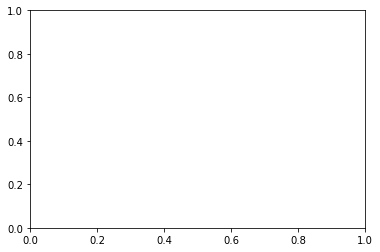

In [122]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

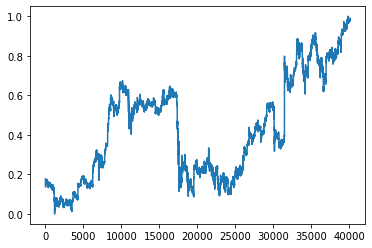

In [124]:
df5=df4.tolist()
df5.extend(lst_output)
plt.plot(df5[1200:])

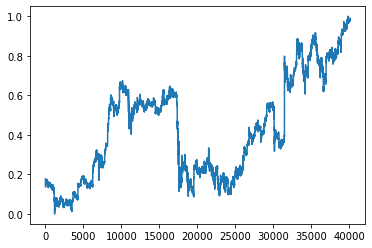

In [125]:
df5=df4.tolist()
df5.extend(lst_output)
plt.plot(df4[1200:])


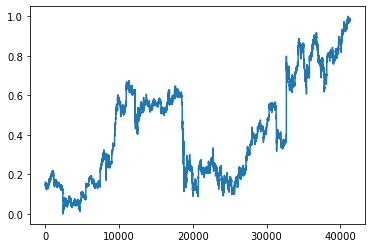

In [126]:
plt.plot(df5)

In [129]:
df5=scaler.inverse_transform(df5).tolist()

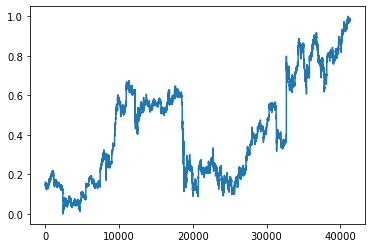

In [130]:
plt.plot(df5)

In [135]:
import seaborn as sns

In [138]:
sns.countplot(x='SP500',data=df5)


AttributeError: 'list' object has no attribute 'get'

In [137]:
df5

[[0.14455852156057603],
 [0.1453798767967145],
 [0.14497330595482616],
 [0.14291581108829554],
 [0.14373716632443578],
 [0.14866529774127368],
 [0.15211498973306004],
 [0.14989733059548271],
 [0.150102669404518],
 [0.14948665297741393],
 [0.15318275154004102],
 [0.1564681724846002],
 [0.15441067761807048],
 [0.15868172484599619],
 [0.1597535934291594],
 [0.16032032854209444],
 [0.15852156057494948],
 [0.15852156057494948],
 [0.1564681724846002],
 [0.15893223819301916],
 [0.156878850102669],
 [0.15359342915811158],
 [0.15400410677618126],
 [0.15400410677618126],
 [0.15195071868583288],
 [0.15195071868583288],
 [0.1533264887063659],
 [0.1548254620123206],
 [0.15564681724845997],
 [0.15236139630390166],
 [0.1515400410677623],
 [0.15400410677618126],
 [0.15400410677618126],
 [0.1548254620123206],
 [0.15770020533880924],
 [0.1597535934291594],
 [0.1564681724846002],
 [0.1503080082135524],
 [0.14795482546201288],
 [0.14784394250513344],
 [0.1466119096509244],
 [0.14209445585215708],
 [0.1396

In [ ]:
df5.